# Project: Investigate a TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

As movies are the source of entertainment so it attract me the most how diffrent movies earn and what factor that we should look about a movies

data have diffrent columns : 
```
['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj']
```

### Question I'm intrested in:

> * which movie is the highest and lowest grossing?
* popular genres year by year.
* catogorise the movies into long, medium and short
* popular actor which perform most movies.
* how profit is related by popularity, vote_average and runtime.
* how profit rises with time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from collections import defaultdict 

%matplotlib inline

pd.set_option('display.max_columns',50)

df = pd.read_csv("input/tmdb-movies.csv")
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='wrangling'></a>
## Data Wrangling

**Step involes in wrangling**

1. Remove useless columns.
2. missing value treatment.
3. Outlier removal.
4. duplicate value removal
5. change the datatypes of columns

### General Properties

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
df.shape

(10866, 21)

In [7]:
# columns not requires in analysis
notreq = ['id','imdb_id', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'budget_adj', 'revenue_adj']
df.drop(notreq, axis = 1, inplace = True)

In [8]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'runtime',
       'genres', 'release_date', 'vote_average', 'release_year'],
      dtype='object')

In [9]:
df.shape

(10866, 10)

## Data cleaning

#### removing NAN values

In [10]:
df.isnull().sum()/df.shape[0]

popularity        0.000000
budget            0.000000
revenue           0.000000
original_title    0.000000
cast              0.006994
runtime           0.000000
genres            0.002117
release_date      0.000000
vote_average      0.000000
release_year      0.000000
dtype: float64

In [11]:
df.dropna(inplace = True)

#### removing duplicate

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(10767, 10)

#### Replace 0 with np.NAN

In [15]:
df.describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,10767.000000,1.076700e+04,1.076700e+04,10767.000000,10767.000000,10767.000000
mean,0.650924,1.475532e+07,4.018610e+07,102.413393,5.967549,2001.283459
std,1.003565,3.102387e+07,1.174783e+08,30.906009,0.931426,12.815909
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.209957,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,0.386062,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,0.719253,1.600000e+07,2.476490e+07,112.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


In [16]:
# these are the columns with 0 as minimum which is not possible
temp = ['budget','revenue','runtime']

df[temp] = df[temp].replace({0:np.nan})

df.dropna(inplace = True)

df.shape

(3850, 10)

#### change the datatype

In [17]:
df.dtypes

popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
runtime           float64
genres             object
release_date       object
vote_average      float64
release_year        int64
dtype: object

In [18]:
# release date: object -> date
df['release_date'] = pd.to_datetime(df['release_date'])

In [19]:
# change : float to int
change = ['popularity', 'budget', 'revenue']

df[change] = df[change].astype('int')

df.dtypes

popularity                 int32
budget                     int32
revenue                    int32
original_title            object
cast                      object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

In [20]:
f"There are total {df.shape[0]} movies"

'There are total 3850 movies'

<a id='eda'></a>
## Exploratory Data Analysis

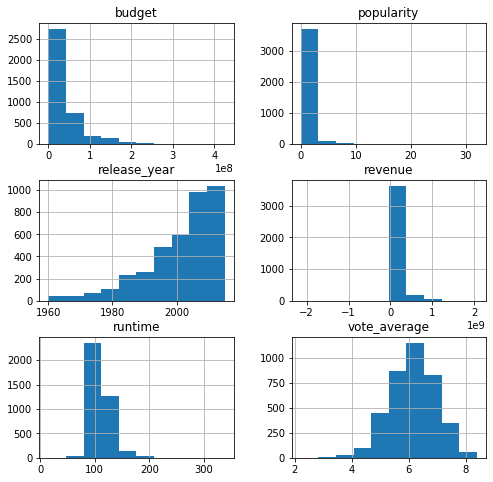

In [21]:
df.hist(figsize=(8,8));

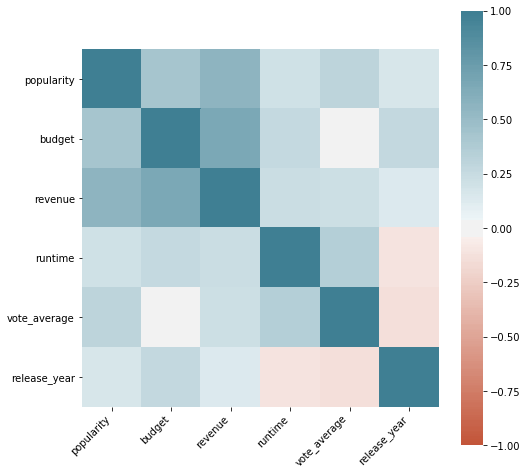

In [22]:
corr = df.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Q1 : which movie is the highest and lowest grossing?

In [23]:
df['profit'] = df['revenue']-df['budget']

In [24]:
highest_profit = df['profit'].idxmax()
lowest_profit = df['profit'].idxmin()

In [25]:
ext = pd.DataFrame([df.iloc[highest_profit,:], df.iloc[lowest_profit,:]])
ext

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year,profit
4021,0,50000000,26199517,Blood Work,Clint Eastwood|Jeff Daniels|Anjelica Huston|Wa...,110.0,Crime|Drama|Mystery|Thriller,2002-08-04,5.7,2002,-23800483
6559,3,12000000,114194847,Step Up,Channing Tatum|Jenna Dewan|Damaine Radcliff|De...,104.0,Music|Drama|Romance|Crime,2006-08-11,6.7,2006,102194847


### popular genres of that year 

In [26]:
df['genres'] = df['genres'].apply(lambda x: " ".join(str(i)+" " for i in x.split('|')))

In [27]:
years = df.groupby('release_year')['genres'].sum()

In [28]:
def cloud(year):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white', 
                    min_font_size = 10).generate(years[year])
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

Enter year in b/w 1960-2015 2015


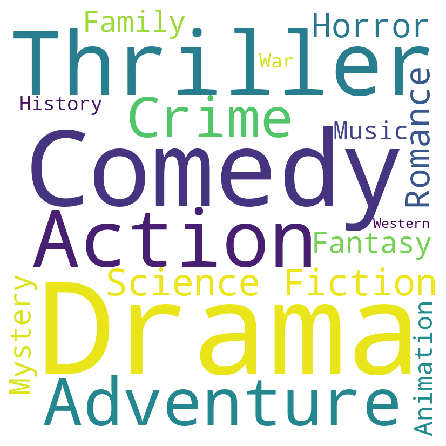

In [29]:
year = int(input("Enter year in b/w 1960-2015 "))
cloud(year)

#### catogorise the movies into Extra long, long, medium and short

In [30]:
bins =[15,95.25,106,119,338]

In [31]:
labels = ['Extra long','Long','Medium','short']

In [32]:
df['category'] = pd.cut(df['runtime'],bins,labels=labels)
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year,profit,category
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Action Adventure Science Fiction Thriller,2015-06-09,6.5,2015,1363528810,short
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120.0,Action Adventure Science Fiction Thriller,2015-05-13,7.1,2015,228436354,short
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119.0,Adventure Science Fiction Thriller,2015-03-18,6.3,2015,185238201,Medium
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136.0,Action Adventure Science Fiction Fantasy,2015-12-15,7.5,2015,1868178225,short
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137.0,Action Crime Thriller,2015-04-01,7.3,2015,1316249360,short


Text(0.5, 1.0, 'Quantity of various category')

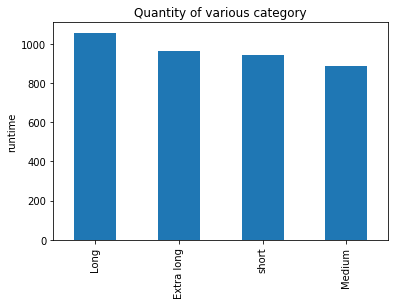

In [33]:
df['category'].value_counts().plot(kind='bar')
plt.ylabel('runtime')
plt.title("Quantity of various category")

#### popular actor which perform most movies.

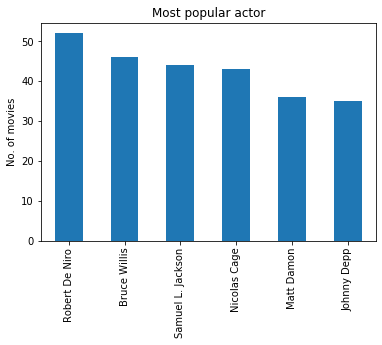

In [34]:
x=df['cast'].str.cat(sep="|")
cast = pd.Series(x.split("|"))
cast.value_counts(ascending=False)[:6].plot(kind='bar')
plt.ylabel("No. of movies")
plt.title('Most popular actor');

#### how profit is related by popularity, vote_average and runtime.

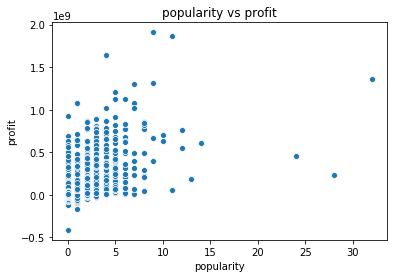

In [35]:
sns.scatterplot(x=df['popularity'],y=df['profit'])
plt.title("popularity vs profit");

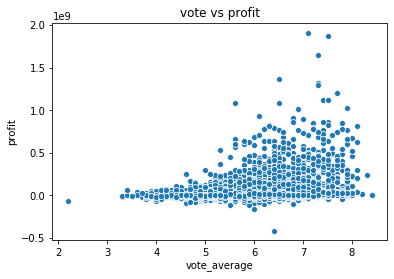

In [36]:
sns.scatterplot(x=df['vote_average'],y=df['profit'])
plt.title("vote vs profit");

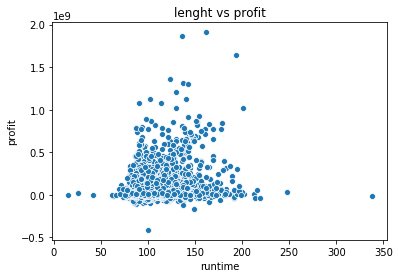

In [37]:
sns.scatterplot(x=df['runtime'],y=df['profit'])
plt.title("lenght vs profit");

#### how profit rises with time.

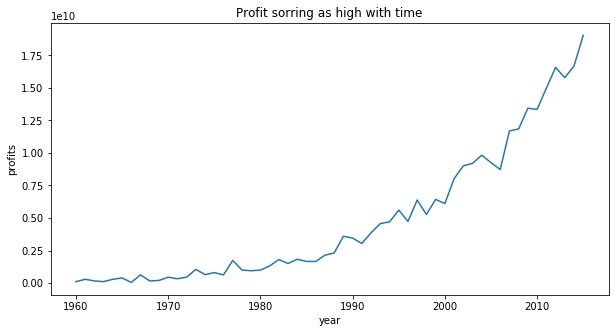

In [38]:
year = df.groupby('release_year')['profit'].sum()
plt.figure(figsize=(10,5))
plt.plot(year)
plt.title('Profit sorring as high with time')
plt.xlabel("year")
plt.ylabel("profits");

<a id='conclusions'></a>
## Conclusions

* maximum profit by setup and maximum loss by bloodwork
* in 2015 maximum movies are of drama
* we have most of the movies as long followed by extra long
* Robert de nitro made most of the movies
* profits increases as year pass by

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0